## <u>Python for AI-ML</u>

# Self Paced Module - Web Scraping

## Scraping Rottentomato Top Movie Names Using Scrapy

In this demo, you will use Scrapy to fetch top movie names from different genres using scrapy

<h3>1. Importing Modules

In [87]:
import scrapy
from scrapy.crawler import CrawlerRunner # To Run our spider

<h3>2. Setting up crochet

<h5>To run spiders smoothly scrapy uses twisted library internally. But the problem is the twisted reactor can only be instantiated once. Therefore, crochet is used so that we can test our spider easily.

In [88]:
import crochet
crochet.setup()

<h3>3. Inspecting the webpage

Inspect the webpage in similar way as we did earlier for all the genres.

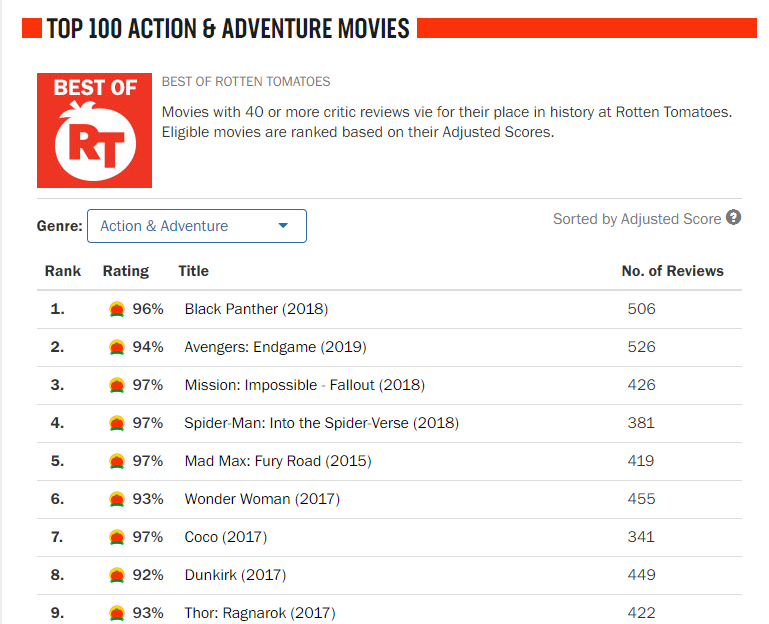

<hr>

<h3>4. Building the Spider

In [89]:
class BookSpider(scrapy.Spider):
    name='RottenRatings' # used to invoke spider
    
    #Used to start the requests
    start_urls=['https://www.rottentomatoes.com/top/bestofrt/top_100_action__adventure_movies/',
             'https://www.rottentomatoes.com/top/bestofrt/top_100_art_house__international_movies/',
             'https://www.rottentomatoes.com/top/bestofrt/top_100_classics_movies/',
             'https://www.rottentomatoes.com/top/bestofrt/top_100_comedy_movies/']

    ''' 
    Invoked by scrapy engine for every url
    Here we will use selectors to scrap the website
    '''
  
    def parse(self,response):
        Genre=response.xpath('//*[@id="top_movies_main"]/h2/text()').extract()
        Genre=Genre[0].replace('100','10')
        movie_name=response.xpath('//*[@id="top_movies_main"]//tr/td[3]/a/text()').extract()
        movie_rank=response.xpath('//*[@id="top_movies_main"]//tr/td[1]/text()').extract()
        print('-'*30,Genre,'-'*30)
        for i in range(10):
            print(movie_rank[i],str.strip(movie_name[i][1:]))
        

<h3>5. Crawling with spider

<h6>Running the spider using CrawlRunner

In [90]:
process = CrawlerRunner({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
})
process.crawl(BookSpider)

------------------------------ Top 10 Comedy Movies ------------------------------
1. Toy Story 4 (2019)
2. Lady Bird (2017)
3. BlacKkKlansman (2018)
4. Booksmart (2019)
5. The Farewell (2019)
6. Modern Times (1936)
7. The Kid (1921)
8. It Happened One Night (1934)
9. Eighth Grade (2018)
10. Coco (2017)
------------------------------ Top 10 Action & Adventure Movies ------------------------------
1. Black Panther (2018)
2. Avengers: Endgame (2019)
3. Mission: Impossible - Fallout (2018)
4. Spider-Man: Into the Spider-Verse (2018)
5. Mad Max: Fury Road (2015)
6. Wonder Woman (2017)
7. Coco (2017)
8. Dunkirk (2017)
9. Thor: Ragnarok (2017)
10. Logan (2017)
------------------------------ Top 10 Classics Movies ------------------------------
1. The Wizard of Oz (1939)
2. Citizen Kane (1941)
3. The Cabinet of Dr. Caligari (Das Cabinet des Dr. Caligari) (1920)
4. Casablanca (1942)
5. Modern Times (1936)
6. The Third Man (1949)
7. The Kid (1921)
8. It Happened One Night (1934)
9. Snow White a

##### Conclusion: This code demonstrate how to fetch data using Scrapy.